# T-Tests

***

#### Packages
***

In [1]:
import numpy as np
import pandas as pd
import statsmodels.stats.weightstats as stat
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("fivethirtyeight")

<br>

#### Fake data values

***

In [2]:
m_a, s_a, m_b, s_b = 1.0, 0.4, 2.0, 0.4
N = 40

a = np.random.normal(loc=m_a, scale=s_a, size=40)
b = np.random.normal(loc=m_b, scale=s_b, size=40)

df = pd.DataFrame({'Category': ['A'] * len(a) + ['B'] * len(b), 'Value': np.hstack([a,b])})

df

,Category,Value
0,A,0.649242
1,A,1.340691
2,A,2.068505
3,A,1.095975
4,A,0.980269
...,...,...
75,B,2.061815
76,B,2.007165
77,B,2.445675
78,B,2.447986


<br>

#### Plot data

***

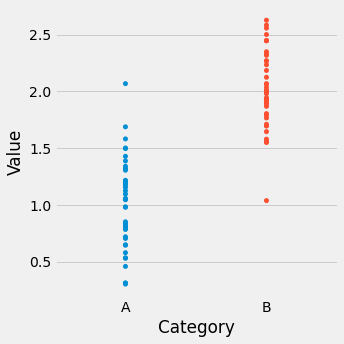

In [3]:
sns.catplot(x='Category', y='Value', jitter=False, data=df);

<br>

#### T-test

***

In [10]:
# test statistic, pvalue of the t-test, degrees of freedom used in the t-test
t, p, d = stat.ttest_ind(a, b)
print(f"P: {p:0.2f}")
# There's also a scipy.stats version.
t_ss, p_ss = ss.ttest_ind(a, b)
print(f"P_scipy: {p_ss:0.2f}")

P: 0.00
P_scipy: 0.00


<br>

#### Visualisation

***

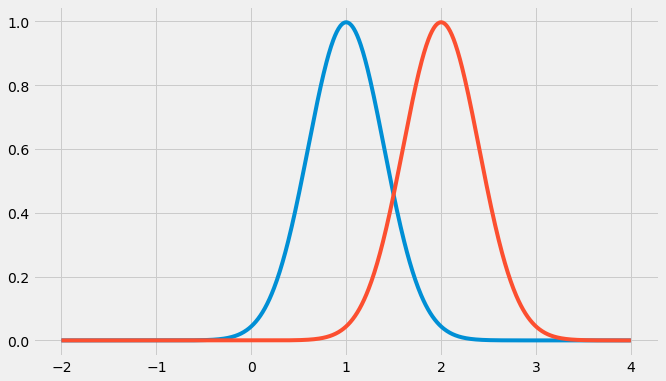

In [5]:
x = np.linspace(-2.0, 4.0, 1000)

y_a = ss.norm.pdf(x, m_a, s_a)
y_b = ss.norm.pdf(x, m_b, s_b)

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(x, y_a)
ax.plot(x, y_b)

plt.show()

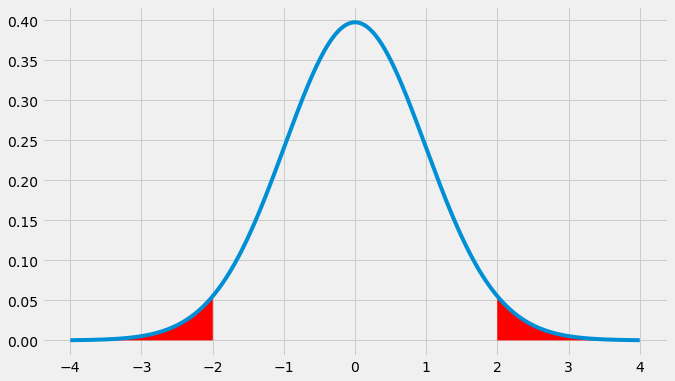

In [7]:
x_t = np.linspace(-4.0, 4.0, 1000)
t = ss.t.pdf(x_t, d)
tf = pd.DataFrame({'x': x_t, 't': t})

tcrit = abs(ss.t.ppf(0.025, d))
one = tf[tf['x'] >= tcrit]
two = tf[tf['x'] <= -tcrit]

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(x_t, t)
ax.fill_between(one['x'], one['t'], 0, facecolor="red")
ax.fill_between(two['x'], two['t'], 0, facecolor="red")

plt.show()

<br>

#### Type I errors - False Positives

***

In [16]:
trials = 10000
N = 100
m_a, m_b, s = 2.0, 2.0, 0.3
rejects = 0

for i in range(trials):
    a = np.random.normal(loc=m_a, scale=s, size=N)
    b = np.random.normal(loc=m_b, scale=s, size=N)
    if ss.ttest_ind(a, b)[1] <= 0.05:
        rejects = rejects + 1

typei = 100.0 * (rejects / trials)
print(f"{typei:0.2f}%")

4.91%


<br>

#### Type II errors - False Negatives

***

In [19]:
trials = 10000
N = 100
m_a, m_b, s = 2.0, 2.1, 0.3
dont = 0

for i in range(trials):
    a = np.random.normal(loc=m_a, scale=s, size=N)
    b = np.random.normal(loc=m_b, scale=s, size=N)
    if ss.ttest_ind(a, b)[1] > 0.05:
        dont = dont + 1

typeii = 100.0 * (dont / trials)
print(f"{typeii:0.2f}%")

34.88%


***